**SETUP**

In [1]:
import math
import pandas # libreria de analisis de datos
import numpy # libreria matematica
import matplotlib.pyplot as matplot # extension de numpy

In [2]:
df_autos = pandas.read_csv('data/cars.csv')

In [3]:
print(df_autos.head()) # print first five dataframe rows

   normalized-losses         make fuel-type aspiration num-of-doors   
0                NaN  alfa-romero       gas        std          two  \
1                NaN  alfa-romero       gas        std          two   
2                NaN  alfa-romero       gas        std          two   
3              164.0         audi       gas        std         four   
4              164.0         audi       gas        std         four   

    body-style drive-wheels engine-location  wheel-base  length  ...   
0  convertible          rwd           front        88.6   168.8  ...  \
1  convertible          rwd           front        88.6   168.8  ...   
2    hatchback          rwd           front        94.5   171.2  ...   
3        sedan          fwd           front        99.8   176.6  ...   
4        sedan          4wd           front        99.4   176.6  ...   

   fuel-system  bore  stroke compression-ratio horsepower  peak-rpm city-mpg   
0         mpfi  3.47    2.68               9.0      111.0   

In [4]:
print(df_autos.dtypes) # print data types of dataframe fields

normalized-losses    float64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
symboling              int64
dtype: object


In [5]:
# -- METADATOS –
df_autos.describe()

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,symboling
count,164.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,201.000000,201.000000,205.000000,203.000000,203.000000,205.000000,205.000000,201.000000,205.000000
mean,122.000000,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329751,3.255423,10.142537,104.256158,5125.369458,25.219512,30.751220,13207.129353,0.834146
std,35.442168,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.273539,0.316717,3.972040,39.714369,479.334560,6.542142,6.886443,7947.066342,1.245307
min,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,-2.000000
25%,94.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000,0.000000
50%,115.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000,1.000000
75%,150.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000,2.000000
max,256.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000,3.000000


In [6]:
# Sólo los atributos categóricos
df_autos.describe(include=[object])

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system
count,205,205,205,203,205,205,205,205,205,205
unique,22,2,2,2,5,3,2,7,7,8
top,toyota,gas,std,four,sedan,fwd,front,ohc,four,mpfi
freq,32,185,168,114,96,120,202,148,159,94


**PREPROCESAMIENTO DE DATOS**

**horsepower**



In [7]:
pandas.value_counts(df_autos['horsepower'])

horsepower
68.0     19
70.0     11
69.0     10
116.0     9
110.0     8
95.0      7
114.0     6
160.0     6
101.0     6
62.0      6
88.0      6
145.0     5
76.0      5
97.0      5
82.0      5
84.0      5
102.0     5
92.0      4
111.0     4
123.0     4
86.0      4
207.0     3
182.0     3
90.0      3
121.0     3
152.0     3
85.0      3
73.0      3
161.0     2
94.0      2
56.0      2
112.0     2
184.0     2
155.0     2
156.0     2
52.0      2
100.0     2
162.0     2
176.0     2
140.0     1
115.0     1
134.0     1
78.0      1
48.0      1
288.0     1
143.0     1
142.0     1
200.0     1
58.0      1
55.0      1
60.0      1
175.0     1
154.0     1
72.0      1
120.0     1
64.0      1
135.0     1
262.0     1
106.0     1
Name: count, dtype: int64

In [8]:
# ANALIZO POSIBLES VALORES PARA LA COLUMNA HOURSEPOWER
print('Hoursepower (before):', df_autos.horsepower.unique())
# ELIMINO LAS TUPLAS CON ?
df_autos = df_autos.drop(df_autos[df_autos.horsepower == '?'].index)
df_autos = df_autos.astype({'horsepower':'int32'})
print('Hoursepower (after):', df_autos.horsepower.unique())

Hoursepower (before): [111. 154. 102. 115. 110. 140. 160. 101. 121. 182.  48.  70.  68.  88.
 145.  58.  76.  60.  86. 100.  78.  90. 176. 262. 135.  84.  64. 120.
  72. 123. 155. 184. 175. 116.  69.  55.  97. 152. 200.  95. 142. 143.
 207. 288.  nan  73.  82.  94.  62.  56. 112.  92. 161. 156.  52.  85.
 114. 162. 134. 106.]


IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer: Error while type casting for column 'horsepower'

**price**

In [10]:
# ANALIZO POSIBLES VALORES PARA LA COLUMNA PRICE
print('Price (before):', df_autos.price.unique())
# ELIMINO LAS TUPLAS CON ?
df_autos = df_autos.drop(df_autos[df_autos.price == '?'].index)
df_autos = df_autos.astype({'price':'int32'})
print('Price (after):', df_autos.price.unique())

Price (before): [13495. 16500. 13950. 17450. 15250. 17710. 18920. 23875.    nan 16430.
 16925. 20970. 21105. 24565. 30760. 41315. 36880.  5151.  6295.  6575.
  5572.  6377.  7957.  6229.  6692.  7609.  8558.  8921. 12964.  6479.
  6855.  5399.  6529.  7129.  7295.  7895.  9095.  8845. 10295. 12945.
 10345.  6785. 11048. 32250. 35550. 36000.  5195.  6095.  6795.  6695.
  7395. 10945. 11845. 13645. 15645.  8495. 10595. 10245. 10795. 11245.
 18280. 18344. 25552. 28248. 28176. 31600. 34184. 35056. 40960. 45400.
 16503.  5389.  6189.  6669.  7689.  9959.  8499. 12629. 14869. 14489.
  6989.  8189.  9279.  5499.  7099.  6649.  6849.  7349.  7299.  7799.
  7499.  7999.  8249.  8949.  9549. 13499. 14399. 17199. 19699. 18399.
 11900. 13200. 12440. 13860. 15580. 16900. 16695. 17075. 16630. 17950.
 18150. 12764. 22018. 32528. 34028. 37028.  9295.  9895. 11850. 12170.
 15040. 15510. 18620.  5118.  7053.  7603.  7126.  7775.  9960.  9233.
 11259.  7463. 10198.  8013. 11694.  5348.  6338.  6488.  691

IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer: Error while type casting for column 'price'

**normalized-losses**

In [11]:
df_autos['normalized-losses'] = df_autos['normalized-losses'].replace('?', numpy.nan)
df_autos['normalized-losses'] = df_autos['normalized-losses'].map(lambda x : numpy.int64(x), na_action='ignore')
mean = df_autos['normalized-losses'].mean()
df_autos['normalized-losses'] = df_autos['normalized-losses'].replace(numpy.nan, mean)
pandas.value_counts(df_autos['normalized-losses'])

normalized-losses
122.0    45
161.0    11
91.0      8
150.0     7
128.0     6
134.0     6
104.0     6
95.0      5
102.0     5
103.0     5
74.0      5
85.0      5
65.0      5
94.0      5
168.0     5
106.0     4
148.0     4
118.0     4
93.0      4
83.0      3
101.0     3
115.0     3
154.0     3
125.0     3
137.0     3
108.0     2
87.0      2
119.0     2
194.0     2
197.0     2
89.0      2
158.0     2
192.0     2
113.0     2
188.0     2
81.0      2
110.0     2
145.0     2
129.0     2
164.0     2
153.0     2
186.0     1
107.0     1
78.0      1
231.0     1
77.0      1
142.0     1
98.0      1
121.0     1
90.0      1
256.0     1
Name: count, dtype: int64

In [12]:
mean

122.0

**MEDIDAS ESTADISTICAS**

**horsepower**

In [13]:
df_autos['horsepower'].describe()

count    203.000000
mean     104.256158
std       39.714369
min       48.000000
25%       70.000000
50%       95.000000
75%      116.000000
max      288.000000
Name: horsepower, dtype: float64

In [14]:
media = df_autos['horsepower'].mean()
mediana = df_autos['horsepower'].median()
moda = df_autos['horsepower'].mode()

print("Media %.1f" % media)
print("Mediana: %.1f \nModa: %.1f" % (mediana,moda))

Media 104.3
Mediana: 95.0 
Moda: 68.0


/tmp/ipykernel_85674/820128157.py:6: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  print("Mediana: %.1f \nModa: %.1f" % (mediana,moda))


In [15]:
min = df_autos['horsepower'].min()
max = df_autos['horsepower'].max()

print("Mínimo %.1f" % min)
print("Máximo: %.1f" % max)

Mínimo 48.0
Máximo: 288.0


In [16]:
q1 = numpy.quantile(df_autos.horsepower, 0.25)
q3 = numpy.quantile(df_autos.horsepower, 0.75)
ric = q3 - q1
print('Q1 = ', q1)
print('Q2 = ', mediana)
print('Q3 = ', q3)
print("RIC = %.1f" % ric)

Q1 =  nan
Q2 =  95.0
Q3 =  nan
RIC = nan


In [17]:
lim_inf = q1 - 1.5 * ric
lim_sup = q3 + 1.5 * ric
print('Límite inferior: ', lim_inf)
print('Límite superior: ', lim_sup)

Límite inferior:  nan
Límite superior:  nan


In [18]:
#BIGOTES
big_inf = None
big_sup = None
#ordeno la columna para empezar a buscar en sus extremos
horsepower_list = (df_autos['horsepower'].sort_values(ascending=True)).tolist()
for hp in horsepower_list:
  if (hp >= lim_inf) and (hp <= lim_sup):
    big_inf = hp
    break
for hp in reversed(horsepower_list):
  if (hp >= lim_inf) and (hp <= lim_sup):
    big_sup = hp
    break
print(big_inf)
print(big_sup)

None
None


In [19]:
#INTERVALO DE VALORES ATÍPICOS LEVES Y EXTREMOS
end_mild = lim_sup + (ric * 1.5)
print('Intervado de valores atípicos leves = [%.1i, %.1i]' % (lim_sup, end_mild))
print('Intervado de valores atípicos extremos = (%.1i, %.9s)' % (end_mild, '+infinito'))

ValueError: cannot convert float NaN to integer

In [20]:
#LISTA DE VALORES ATÍPICOS LEVES Y EXTREMOS
mild_outliers = []
extreme_outliers = []

for m in horsepower_list:
  if (m >= lim_sup) and (m <= end_mild):
    mild_outliers.append(m);
  if (m > end_mild):
    extreme_outliers.append(m);
print('Valores atípicos leves:', mild_outliers)
print('Valores atípicos extremos:', extreme_outliers)

Valores atípicos leves: []
Valores atípicos extremos: []


**price group by fuel-type**

In [21]:
statics_price_by_fueltype = df_autos.groupby('fuel-type').describe()['price']
statics_price_by_fueltype

,count,mean,std,min,25%,50%,75%,max
fuel-type,,,,,,,,
diesel,20.0,15838.15000,7759.843713,7099.0,9120.0,13852.5,19375.5,31600.0
gas,181.0,12916.40884,7934.923212,5118.0,7609.0,9989.0,15985.0,45400.0


In [22]:
ric_gas = statics_price_by_fueltype['75%'][1] - statics_price_by_fueltype['25%'][1]
ric_diesel = statics_price_by_fueltype['75%'][0] - statics_price_by_fueltype['25%'][0]
print('Rango intercuartil:\n RIC_Gas = %.2f\n RIC_Diesel = %.2f' % (ric_gas, ric_diesel))

Rango intercuartil:
 RIC_Gas = 8376.00
 RIC_Diesel = 10255.50


In [23]:
df_autos.head()

,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,symboling
0,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,3
1,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,3
2,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,1
3,164.0,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,2
4,164.0,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,2


In [24]:
df_autos_reduced = df_autos.drop(
    ['symboling', 'normalized-losses', 'make', 'aspiration', 'num-of-doors',
     'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length',
     'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders',
     'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio',
     'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg'], axis=1)
df_autos_reduced

,fuel-type,price
0,gas,13495.0
1,gas,16500.0
2,gas,16500.0
3,gas,13950.0
4,gas,17450.0
...,...,...
200,gas,16845.0
201,gas,19045.0
202,gas,21485.0
203,diesel,22470.0


In [25]:
gas_cars = df_autos_reduced.drop(df_autos[df_autos['fuel-type'] != 'gas'].index)
gas_cars.describe()

,price
count,181.000000
mean,12916.408840
std,7934.923212
min,5118.000000
25%,7609.000000
50%,9989.000000
75%,15985.000000
max,45400.000000


In [26]:
diesel_cars = df_autos_reduced.drop(df_autos[df_autos['fuel-type'] != 'diesel'].index)
diesel_cars.describe()

,price
count,20.000000
mean,15838.150000
std,7759.843713
min,7099.000000
25%,9120.000000
50%,13852.500000
75%,19375.500000
max,31600.000000


In [27]:
#LIMITES INFERIOR Y SUPERIOR, AUTOS A NAFTA
q1 = numpy.quantile(gas_cars.price, 0.25)
q3 = numpy.quantile(gas_cars.price, 0.75)
ric = q3 - q1
lim_inf = q1 - 1.5 * ric
lim_sup = q3 + 1.5 * ric
print('Límite inferior: ', lim_inf)
print('Límite superior: ', lim_sup)

Límite inferior:  nan
Límite superior:  nan


In [28]:
#BIGOTES AUTOS A NAFTA
big_inf = None
big_sup = None
#ordeno la columna para empezar a buscar en sus extremos
price_list = (gas_cars['price'].sort_values(ascending=True)).tolist()
for p in price_list:
  if (p >= lim_inf) and (p <= lim_sup):
    big_inf = p
    break
for p in reversed(price_list):
  if (p >= lim_inf) and (p <= lim_sup):
    big_sup = p
    break
print(big_inf)
print(big_sup)

None
None


In [29]:
#LIMITES INFERIOR Y SUPERIOR, AUTOS A DIESEL
q1 = numpy.quantile(diesel_cars.price, 0.25)
q3 = numpy.quantile(diesel_cars.price, 0.75)
ric = q3 - q1
lim_inf = q1 - 1.5 * ric
lim_sup = q3 + 1.5 * ric
print('Límite inferior: ', lim_inf)
print('Límite superior: ', lim_sup)

Límite inferior:  -6263.25
Límite superior:  34758.75


In [30]:
#BIGOTES AUTOS A DIESEL
big_inf = None
big_sup = None
#ordeno la columna para empezar a buscar en sus extremos
price_list = (diesel_cars['price'].sort_values(ascending=True)).tolist()
for p in price_list:
  if (p >= lim_inf) and (p <= lim_sup):
    big_inf = p
    break
for p in reversed(price_list):
  if (p >= lim_inf) and (p <= lim_sup):
    big_sup = p
    break
print(big_inf)
print(big_sup)

7099.0
31600.0


**curb-weight y highway-mpg**

In [31]:
# Filtro las columnas que me interesan y chequeo el tipo
df_curbwight_and_highwaympg = df_autos.drop(
    ['symboling', 'normalized-losses', 'make', 'aspiration', 'num-of-doors',
     'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length',
     'width', 'height', 'engine-type', 'num-of-cylinders', 'engine-size',
     'fuel-system', 'bore', 'stroke', 'compression-ratio', 'horsepower',
     'peak-rpm', 'city-mpg', 'price', 'fuel-type'], axis=1)
print(df_curbwight_and_highwaympg.dtypes)

curb-weight    int64
highway-mpg    int64
dtype: object


In [32]:
# CALCULO EL COEF. DE CORRELACIÓN LINEAL
coef_corr_lineal = df_curbwight_and_highwaympg.corr()
print(coef_corr_lineal)

             curb-weight  highway-mpg
curb-weight     1.000000    -0.797465
highway-mpg    -0.797465     1.000000


**GRAFICOS**

**Diagrama de Barras**

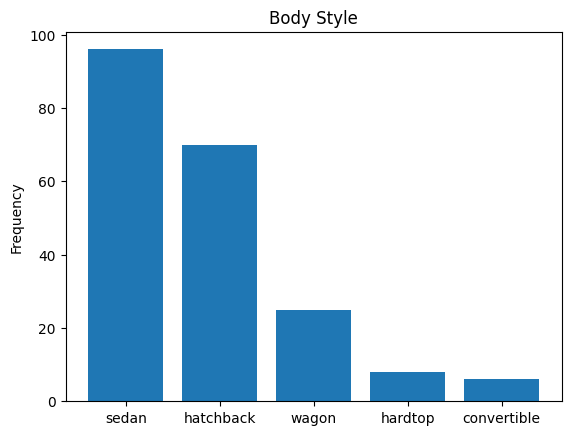

In [33]:
makes_list = pandas.value_counts(df_autos['body-style'])
matplot.figure()
matplot.bar(numpy.arange(len(makes_list)), makes_list)
matplot.title('Body Style')
matplot.ylabel('Frequency')
matplot.xticks(numpy.arange(len(makes_list)), makes_list.index)
matplot.show()

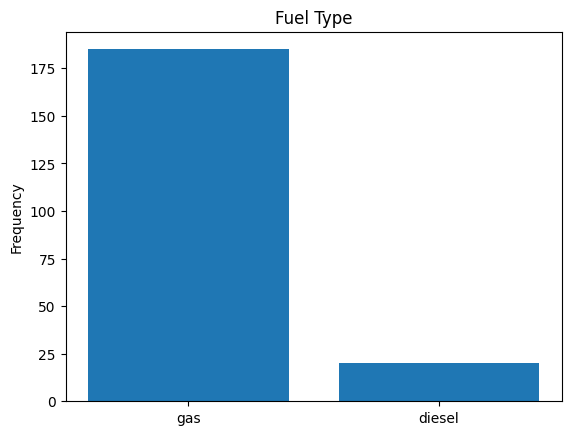

In [34]:
fuel_type_list = pandas.value_counts(df_autos['fuel-type'])
matplot.figure()
N = len(fuel_type_list)
matplot.bar(numpy.arange(N), fuel_type_list)  # Build the bar
matplot.title('Fuel Type')
matplot.ylabel('Frequency')
matplot.xticks(numpy.arange( N ), fuel_type_list.index)
matplot.show()


**Gráfico de torta**

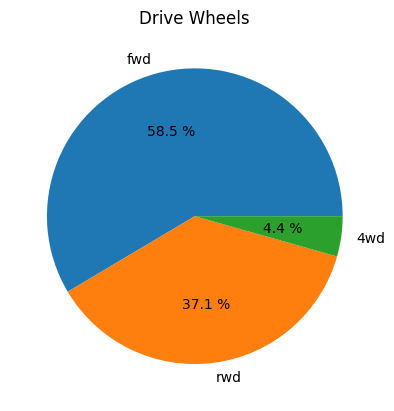

In [35]:
matplot.figure()
porcion = pandas.value_counts(df_autos['drive-wheels'])
matplot.pie(porcion,labels=porcion.index, autopct="%0.1f %%")
matplot.title('Drive Wheels')
matplot.show()


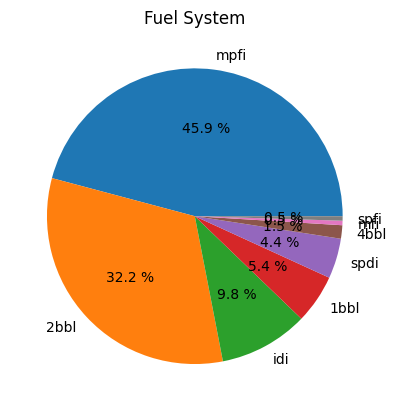

In [36]:
matplot.figure()
porcion = pandas.value_counts(df_autos['fuel-system'])
matplot.pie(porcion, labels=porcion.index, autopct="%0.1f %%")
matplot.title('Fuel System')
matplot.show()

**Histograma**

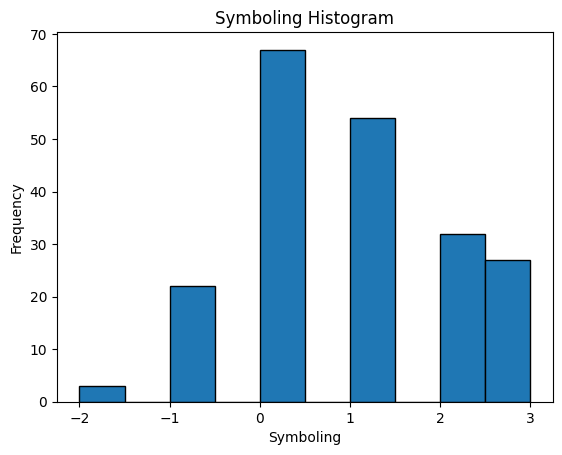

In [37]:
matplot.figure()
matplot.hist(df_autos['symboling'], bins = 10, edgecolor = 'black', linewidth=1)
matplot.xlabel('Symboling')
matplot.ylabel('Frequency')
matplot.title('Symboling Histogram')
matplot.show()


**Diagrama de caja**

In [38]:
print('Q1 = ', q1)
print('Q2 = ', mediana)
print('Q3 = ', q3)

Q1 =  9120.0
Q2 =  95.0
Q3 =  19375.5


<Axes: >

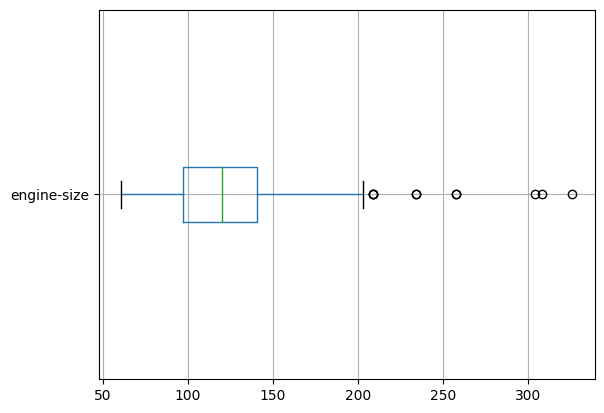

In [39]:
df_autos.boxplot(column=['engine-size'], vert=False)

**Diagrama dispersión**

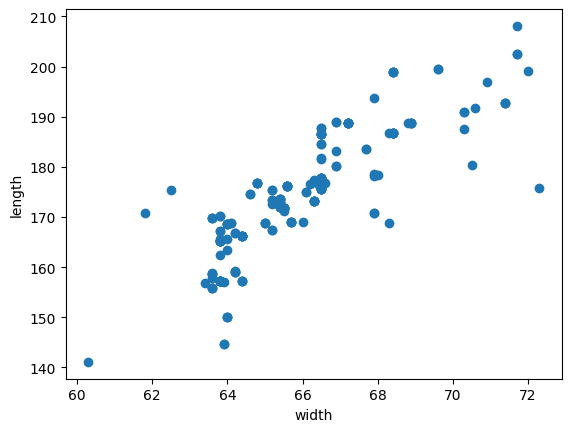

In [40]:
matplot.figure()
matplot.scatter(df_autos['width'], df_autos['length'])
matplot.xlabel('width')
matplot.ylabel('length')
matplot.show()

**DISCRETIZACIÓN**

**engince-size**

In [41]:
print(len(df_autos['engine-size']))

205


In [42]:
split_point = int((df_autos['engine-size'].max() - df_autos['engine-size'].min()) / 2)
split_point

132

In [43]:
# Discretización por rango
column = pandas.cut(df_autos['engine-size'], bins=[-math.inf, split_point, math.inf], labels=['small', 'big'])
df_autos['engine-size_discretized'] = pandas.Series.to_frame(column)
print(pandas.value_counts(df_autos['engine-size_discretized']))

engine-size_discretized
small    138
big       67
Name: count, dtype: int64


In [44]:
# Discretización por frecuencia (con valores repetidos)
column = pandas.cut(df_autos['engine-size'], bins=[-math.inf, 110, math.inf], labels=['small', 'big'])
df_autos['engine-size_discretized'] = pandas.Series.to_frame(column)
print(pandas.value_counts(df_autos['engine-size_discretized']))

engine-size_discretized
big      105
small    100
Name: count, dtype: int64


In [45]:
df_autos.loc[df_autos['engine-size'] == 110]

,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,symboling,engine-size_discretized
37,106.0,honda,gas,std,two,hatchback,fwd,front,96.5,167.5,...,3.15,3.58,9.0,86.0,5800.0,27,33,7895.0,0,small
38,106.0,honda,gas,std,two,hatchback,fwd,front,96.5,167.5,...,3.15,3.58,9.0,86.0,5800.0,27,33,9095.0,0,small
39,85.0,honda,gas,std,four,sedan,fwd,front,96.5,175.4,...,3.15,3.58,9.0,86.0,5800.0,27,33,8845.0,0,small
40,85.0,honda,gas,std,four,sedan,fwd,front,96.5,175.4,...,3.15,3.58,9.0,86.0,5800.0,27,33,10295.0,0,small
41,85.0,honda,gas,std,four,sedan,fwd,front,96.5,175.4,...,3.15,3.58,9.0,101.0,5800.0,24,28,12945.0,0,small
42,107.0,honda,gas,std,two,sedan,fwd,front,96.5,169.1,...,3.15,3.58,9.1,100.0,5500.0,25,31,10345.0,1,small
80,153.0,mitsubishi,gas,turbo,two,hatchback,fwd,front,96.3,173.0,...,3.17,3.46,7.5,116.0,5500.0,23,30,9959.0,3,small
87,125.0,mitsubishi,gas,turbo,four,sedan,fwd,front,96.3,172.4,...,3.17,3.46,7.5,116.0,5500.0,23,30,9279.0,1,small
88,137.0,mitsubishi,gas,std,four,sedan,fwd,front,96.3,172.4,...,3.17,3.46,7.5,116.0,5500.0,23,30,9279.0,-1,small
158,91.0,toyota,diesel,std,four,sedan,fwd,front,95.7,166.3,...,3.27,3.35,22.5,56.0,4500.0,34,36,7898.0,0,small


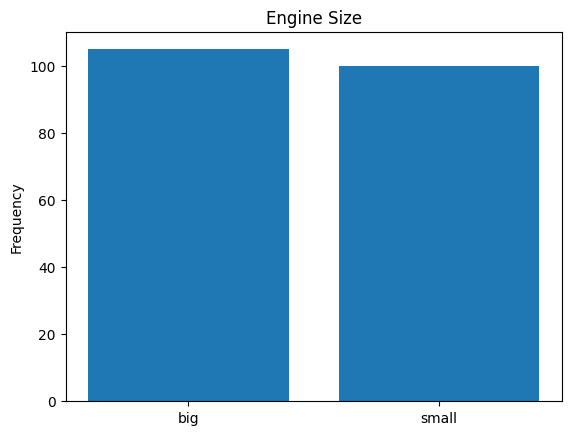

In [46]:
# DIAGRAMA DE BARRAS DEL ATRIBUTO DISCRETIZADO
enginesize_list = pandas.value_counts(df_autos['engine-size_discretized'])
matplot.figure()
N = len(enginesize_list)
matplot.bar(numpy.arange(N), enginesize_list)  # Build the bar
matplot.title('Engine Size')
matplot.ylabel('Frequency')
matplot.xticks(numpy.arange( N ), enginesize_list.index)
matplot.show()